<a href="https://colab.research.google.com/github/Ami1ra1/projects/blob/main/Store_Table_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_excel('Store Table.xlsx')

In [ ]:
# show the first 5 rows of the data
df.head()

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Maket ID
0,1,Peoria,Arizona,Region 2,Old,2601.0,48610.0,1
1,2,Midland,Texas,Region 2,Old,2727.0,45689.0,2
2,3,Spokane,Washington,Region 2,Old,2768.0,49554.0,3
3,4,Denton,Texas,Region 2,Old,2759.0,38284.0,4
4,5,Overland Park,Kansas,Region 2,Old,2869.0,59887.0,5


In [ ]:
# shows the last 5 rows the data
df.tail()

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Maket ID
2010,1295,Gainesville,Florida,Region 1,Old,2418.910277,33453.984223,1295
2011,1296,Dayton,Ohio,Region 1,Old,2418.521400,33449.189266,1296
2012,1297,Wichita Falls,Texas,Region 2,Old,2418.132522,33444.394310,1297
2013,1298,Naperville,Illinois,Region 1,Old,2417.743644,33439.599354,1298
2014,1299,Clovis,California,Region 2,Old,2417.354767,33434.804398,1299


In [ ]:
# show number of the rows and column of the data
df.shape

(2015, 8)

In [ ]:
#show the columns name of the data
df.columns

Index(['Store ID', 'City', 'State', 'Sales Region', 'New Expansion',
       'Marketing Spend', 'Revenue', 'Maket ID'],
      dtype='object')

In [ ]:
#show the null values
df.isnull().sum()

,0
Store ID,0
City,0
State,0
Sales Region,0
New Expansion,0
Marketing Spend,0
Revenue,0
Maket ID,0


In [ ]:
# show the NA values
df.isna().sum()

,0
Store ID,0
City,0
State,0
Sales Region,0
New Expansion,0
Marketing Spend,0
Revenue,0
Maket ID,0


In [ ]:
#show  if there is any duplicated data
df.duplicated().sum()

15

In [ ]:
#remove the duplicated values
df.drop_duplicates(inplace=True)

In [ ]:
#show the statistical analysis
df[['Marketing Spend', 'Revenue']].describe().T

,count,mean,std,min,25%,50%,75%,max
Marketing Spend,2000.0,2533.434768,245.965787,1811.0,2335.982102,2525.268336,2711.054671,3984.0
Revenue,2000.0,34866.098830,5049.059427,15562.0,32225.276691,34611.966150,36989.065696,68828.0


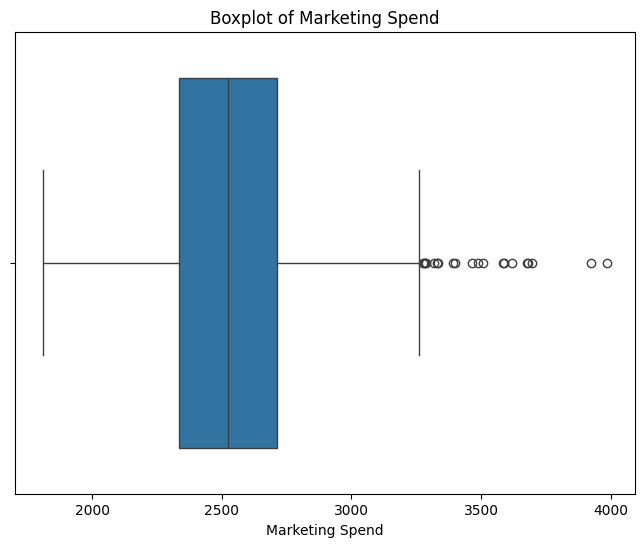

In [ ]:
# boxplot for the Marketing Spend

plt.figure(figsize=(8, 6))
sns.boxplot(x='Marketing Spend', data=df)
plt.title('Boxplot of Marketing Spend')
plt.xlabel('Marketing Spend')
plt.show()

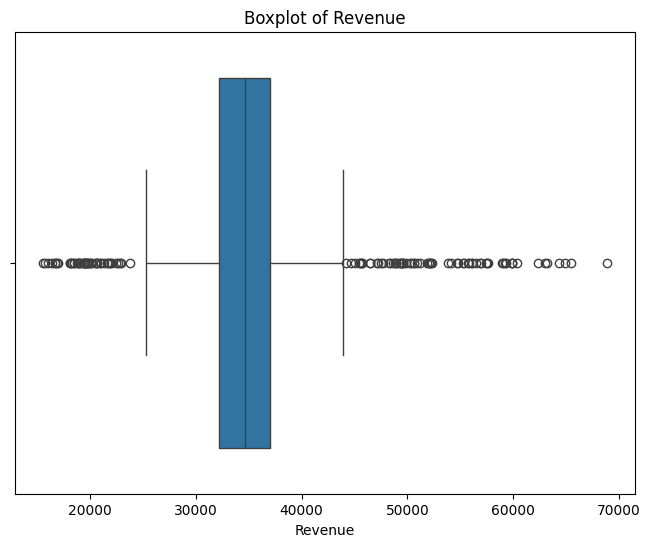

In [ ]:
# boxplot for the Revenue

plt.figure(figsize=(8, 6))
sns.boxplot(x='Revenue', data=df)
plt.title('Boxplot of Revenue')
plt.xlabel('Revenue')
plt.show()

In [ ]:
# code to check if there is an outlier in this revenue

def detect_outliers_iqr(data):
  """
  Detects outliers using the Interquartile Range (IQR) method.

  Args:
    data: A pandas Series or NumPy array of numerical data.

  Returns:
    A list of outlier values.
  """
  Q1 = np.percentile(data, 25)
  Q3 = np.percentile(data, 75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = [x for x in data if x < lower_bound or x > upper_bound]
  return outliers


# Assuming your DataFrame is named 'df' and you want to check for outliers in the 'Revenue' column
revenue_outliers = detect_outliers_iqr(df['Revenue'])

if revenue_outliers:
  print("Outliers detected in Revenue:")
  print(revenue_outliers)
else:
  print("No outliers detected in Revenue.")

Outliers detected in Revenue:
[48610.0, 45689.0, 49554.0, 59887.0, 53827.0, 60338.0, 19569.0, 59840.0, 64906.0, 16860.0, 21988.0, 19888.0, 54701.0, 18471.0, 16690.0, 47729.0, 63027.0, 19120.0, 56836.0, 52114.0, 20123.0, 49856.0, 55790.0, 45017.0, 56921.0, 22972.0, 22680.0, 65475.0, 21718.0, 59283.0, 20057.0, 20455.0, 64302.0, 49506.0, 52250.0, 57625.0, 16029.0, 49191.0, 59870.0, 48254.0, 16372.0, 50233.0, 50364.0, 44223.0, 17006.0, 15562.0, 21824.0, 46490.0, 19350.0, 16652.0, 23764.0, 19448.0, 68828.0, 19529.0, 55684.0, 45418.0, 18297.0, 18966.0, 18838.0, 52078.0, 58951.0, 49609.0, 45550.0, 19563.0, 57530.0, 54768.0, 18754.0, 21286.0, 48796.0, 19708.0, 56089.0, 19752.0, 20949.0, 45666.0, 47482.0, 18215.0, 50650.0, 48933.0, 15735.0, 20669.0, 20541.0, 45632.0, 22824.0, 21953.0, 51229.0, 50583.0, 50895.0, 46503.0, 18089.0, 56504.0, 44635.0, 19811.0, 56140.0, 54145.0, 51882.0, 49290.0, 47108.0, 20703.0, 18099.0, 18942.0, 52072.0, 55203.0, 59254.0, 21603.0, 21056.0, 57432.0, 18454.0, 59060.

In [ ]:
df['New Expansion'] = df['New Expansion'].replace('Old','old')
df['New Expansion'] = df['New Expansion'].replace('New','new')

In [ ]:
# show correlation between the marketing spend and revenue

correlation = df['Marketing Spend'].corr(df['Revenue'])
print(f"Correlation between Marketing Spend and Revenue: {correlation}")

Correlation between Marketing Spend and Revenue: 0.5327252712732409


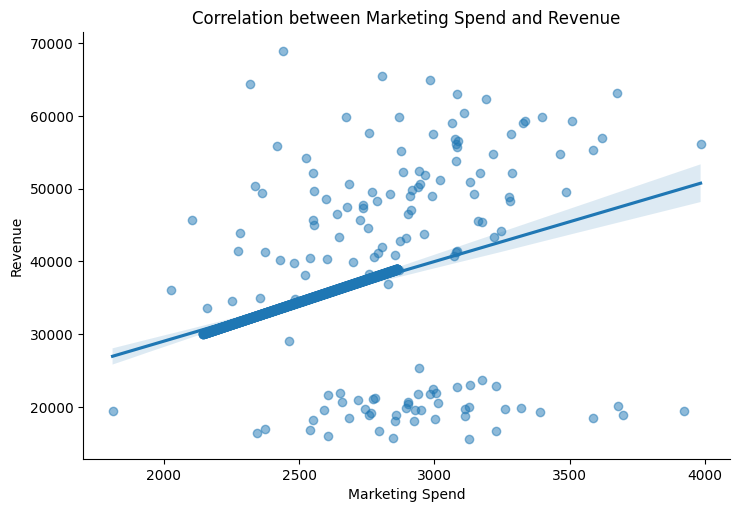

In [ ]:
# Scatter plot with a regression line
sns.lmplot(x='Marketing Spend', y='Revenue', data=df, aspect=1.5, scatter_kws={'alpha':0.5})

# Adding plot title and labels
plt.title('Correlation between Marketing Spend and Revenue')
plt.xlabel('Marketing Spend')
plt.ylabel('Revenue')

# Display the plot
plt.show()

In [ ]:
#show the data types of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Store ID         2000 non-null   int64  
 1   City             2000 non-null   object 
 2   State            2000 non-null   object 
 3   Sales Region     2000 non-null   object 
 4   New Expansion    2000 non-null   object 
 5   Marketing Spend  2000 non-null   float64
 6   Revenue          2000 non-null   float64
 7   Maket ID         2000 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 140.6+ KB


In [ ]:
#calculate retern of invesment per market spend

df['ROI'] = (df['Revenue'] - df['Marketing Spend']) / df['Marketing Spend']

In [ ]:
# Round the 'ROI' column to two decimal places
df['ROI'] = df['ROI'].round(2)

# Display the first few rows of the DataFrame
df.head()


,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Maket ID,ROI
0,1,Peoria,Arizona,Region 2,old,2601.0,48610.0,1,17.69
1,2,Midland,Texas,Region 2,old,2727.0,45689.0,2,15.75
2,3,Spokane,Washington,Region 2,old,2768.0,49554.0,3,16.90
3,4,Denton,Texas,Region 2,old,2759.0,38284.0,4,12.88
4,5,Overland Park,Kansas,Region 2,old,2869.0,59887.0,5,19.87


array([[<Axes: title={'center': 'Marketing Spend'}>,
        <Axes: title={'center': 'Revenue'}>]], dtype=object)

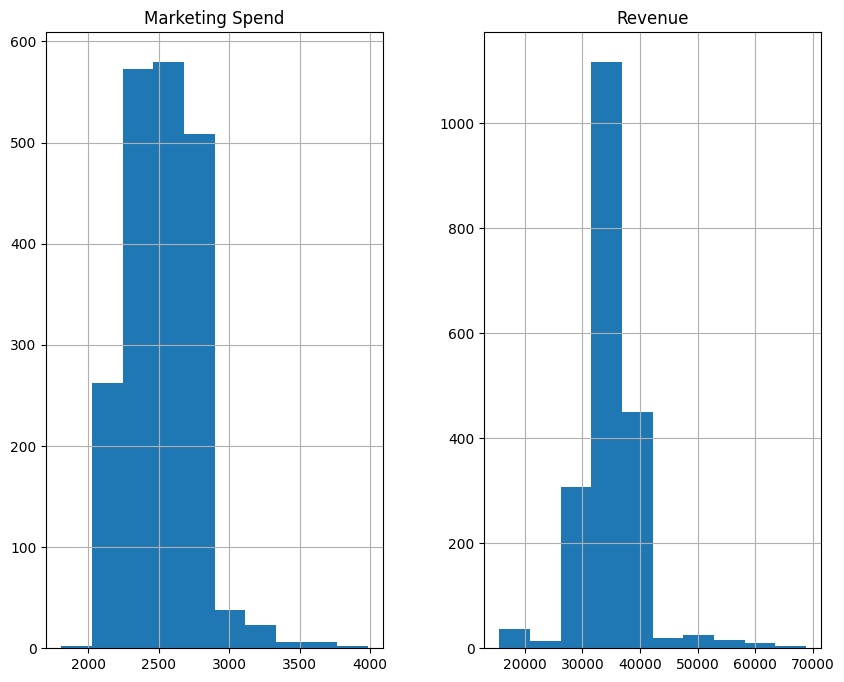

In [ ]:
df[['Marketing Spend', 'Revenue']].hist(figsize=(10,8))

In [ ]:
#read the market excel file
df1 = pd.read_excel('Market Table.xlsx')

In [ ]:
# read the first 5 rows of the data
df1.head()

In [ ]:
# show the columns and rows number
df1.shape

(2000, 6)

In [ ]:
df1['Years in Market'].value_counts()

,count
Years in Market,
1.0,709
3.0,650
2.0,636


In [ ]:
#show null values
df1.isnull().sum()

,0
Maket ID,0
Startup Type,0
Company Size,0
Challenges,0
Marketing Strategy,0
Years in Market,5


In [ ]:
# fill the null values with a backward fill method
df1["Years in Market"] = df1["Years in Market"].fillna(df1["Years in Market"].shift(1))

In [ ]:
# show statistcal analysis of the data
df1[['Company Size']].describe()

In [ ]:
#replace the outlire
df1['Company Size'] = df1['Company Size'].replace(-800,800)

In [ ]:
# show statistcal analysis of the data
df1[['Company Size']].describe()

,Company Size
count,2000.000000
mean,502.131500
std,289.787164
min,5.000000
25%,246.750000
50%,508.000000
75%,756.000000
max,1000.000000


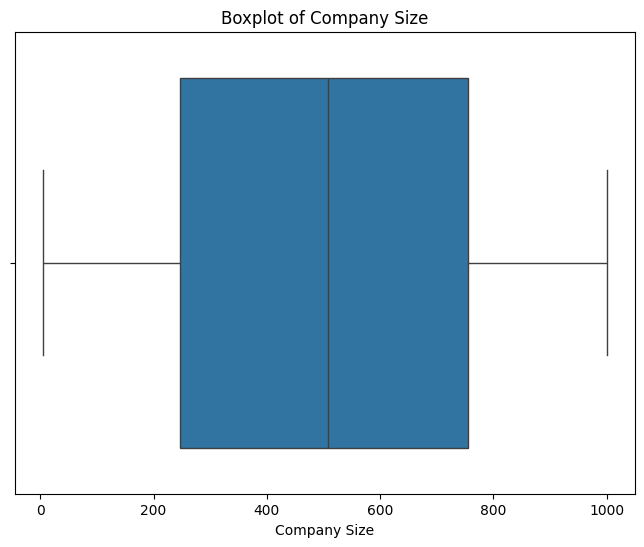

In [ ]:
# boxplot for the company size

plt.figure(figsize=(8, 6))
sns.boxplot(x='Company Size', data=df1)
plt.title('Boxplot of Company Size')
plt.xlabel('Company Size')
plt.show()

In [ ]:
#show the duplicated data
df1.duplicated().sum()

0

In [ ]:
#show data types of the data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Maket ID            2000 non-null   int64  
 1   Startup Type        2000 non-null   object 
 2   Company Size        2000 non-null   int64  
 3   Challenges          2000 non-null   object 
 4   Marketing Strategy  2000 non-null   object 
 5   Years in Market     2000 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 93.9+ KB


In [ ]:
#grouping the company size into segmants
def categorize_company_size(size):
  if 0 <= size <= 10:
    return '0-10'
  elif 10 < size <= 50:
    return '11-50'
  elif 50 < size <= 200:
    return '51-200'
  elif 200 < size <= 500:
    return '201-500'
  elif 500 < size <= 1000:
    return '501-1000'
  else:
    return 'Other'

df1['Company Size Category'] = df1['Company Size'].apply(categorize_company_size)

In [ ]:
df1.head()

,Maket ID,Startup Type,Company Size,Challenges,Marketing Strategy,Years in Market,Company Size Category
0,1,AgriTech,326,Market Competition,Social Media Marketing,2.0,201-500
1,2,FinTech,249,Market Competition,Social Media Marketing,3.0,201-500
2,3,FinTech,915,Product Development Issues,Content Marketing,2.0,501-1000
3,4,RetailTech,620,Scaling and Growth,Direct Marketing,2.0,501-1000
4,5,RetailTech,609,Financial Constraints,Content Marketing,1.0,501-1000


<Axes: >

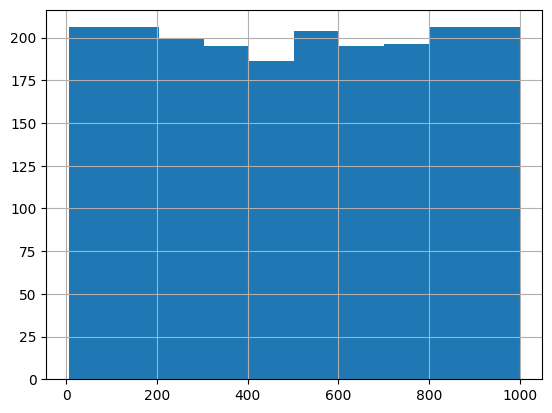

In [ ]:
#show distrbution of the data

df1['Company Size'].hist()

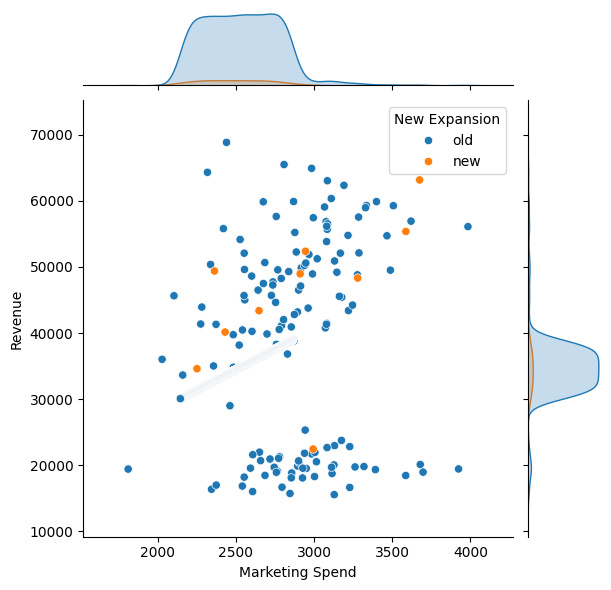

In [ ]:
sns.jointplot(x='Marketing Spend', y='Revenue', data=df, kind='scatter', hue='New Expansion')
plt.show()


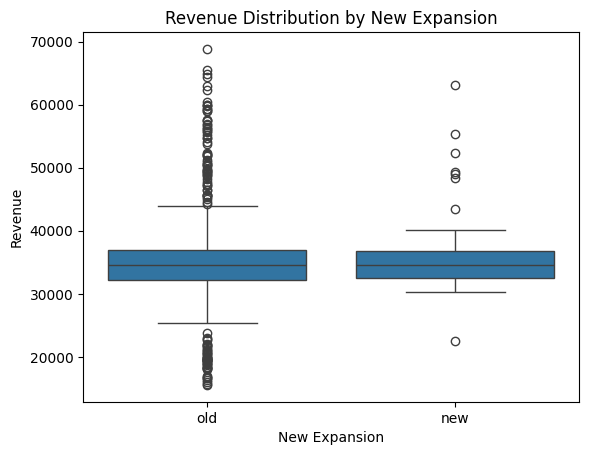

In [ ]:
sns.boxplot(x='New Expansion', y='Revenue', data=df)
plt.title('Revenue Distribution by New Expansion')
plt.show()


In [ ]:
df.groupby('New Expansion')['Revenue'].mean()



,Revenue
New Expansion,
new,35176.757615
old,34844.502230


In [ ]:
df['New Expansion'].value_counts()


,count
New Expansion,
old,1870
new,130


In [ ]:
df['New Expansion'].value_counts(normalize=True) * 100


,proportion
New Expansion,
old,93.5
new,6.5


In [ ]:
#show the groupting data
df1['Company Size Category'].value_counts()

,count
Company Size Category,
501-1000,1009
201-500,588
51-200,304
11-50,89
0-10,10


In [ ]:
#save the file into excel file
df.to_excel('updated startup.xlsx', index=False)
df1.to_excel('updated_market_data.xlsx', index=False)